## EXP 2 - Random Forset

### Import các thư viện cần thiết và tải lên các file dữ liệu

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed để đảm bảo kết quả có thể tái lập
RANDOM_STATE = 42

In [2]:
# Load dữ liệu 
train_exp2 = pd.read_csv('../../data/exp2/train_exp2.csv')
test_exp2 = pd.read_csv('../../data/exp2/test_exp2.csv')

### Chuẩn bị features và target

In [3]:
y_train = train_exp2['Class']

# Loại bỏ các cột không phải là feature
X_train = train_exp2.drop(['Class', 'Id', 'Artist Name', 'Track Name'], axis=1, errors='ignore')
X_test = test_exp2.drop(['Id', 'Artist Name', 'Track Name'], axis=1, errors='ignore')

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (14396, 31)
y_train shape: (14396,)
X_test shape: (3600, 31)


### Phân phối của target

Class
0      500
1     1098
2     1018
3      322
4      310
5     1157
6     2069
7      461
8     1483
9     2019
10    3959
Name: count, dtype: int64


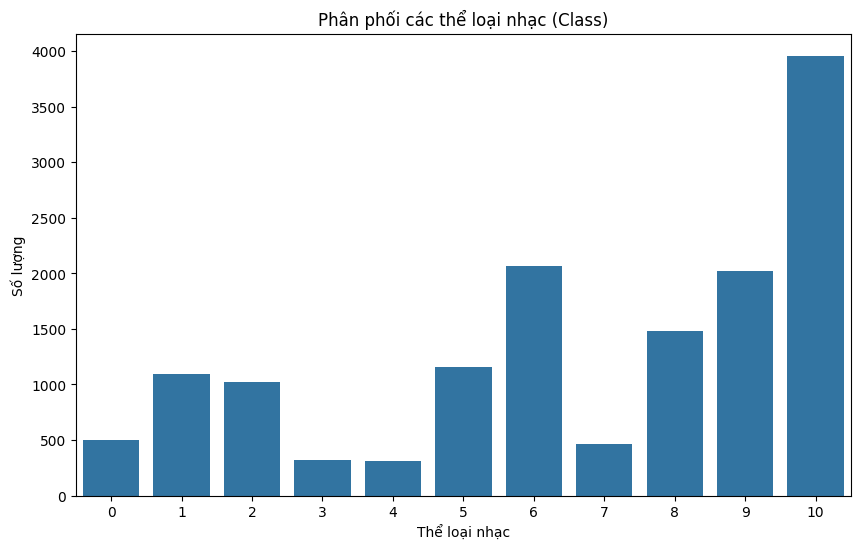

In [4]:
print(y_train.value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Phân phối các thể loại nhạc (Class)')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Số lượng')
plt.show()

### Huấn luyện mô hình

In [5]:
# Khởi tạo mô hình
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Đánh giá mô hình

In [6]:
# Dự đoán
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_proba_rf = rf_model.predict_proba(X_train)

# Tính metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
train_log_loss_rf = log_loss(y_train, y_train_pred_proba_rf)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_f1_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)
cv_accuracy_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print(f"Độ chính xác tập train: {train_accuracy_rf:.4f}")
print(f"F1-Score tập train: {train_f1_rf:.4f}")
print(f"Log Loss tập train: {train_log_loss_rf:.4f}")
print(f"F1-Score CV: {cv_f1_scores_rf.mean():.4f} (±{cv_f1_scores_rf.std() * 2:.4f})")
print(f"Accuracy CV: {cv_accuracy_scores_rf.mean():.4f} (±{cv_accuracy_scores_rf.std() * 2:.4f})")

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Độ chính xác tập train: 0.9837
F1-Score tập train: 0.9837
Log Loss tập train: 0.2617
F1-Score CV: 0.5555 (±0.0057)
Accuracy CV: 0.5700 (±0.0051)


### Phân tích các đặc trưng quan trọng


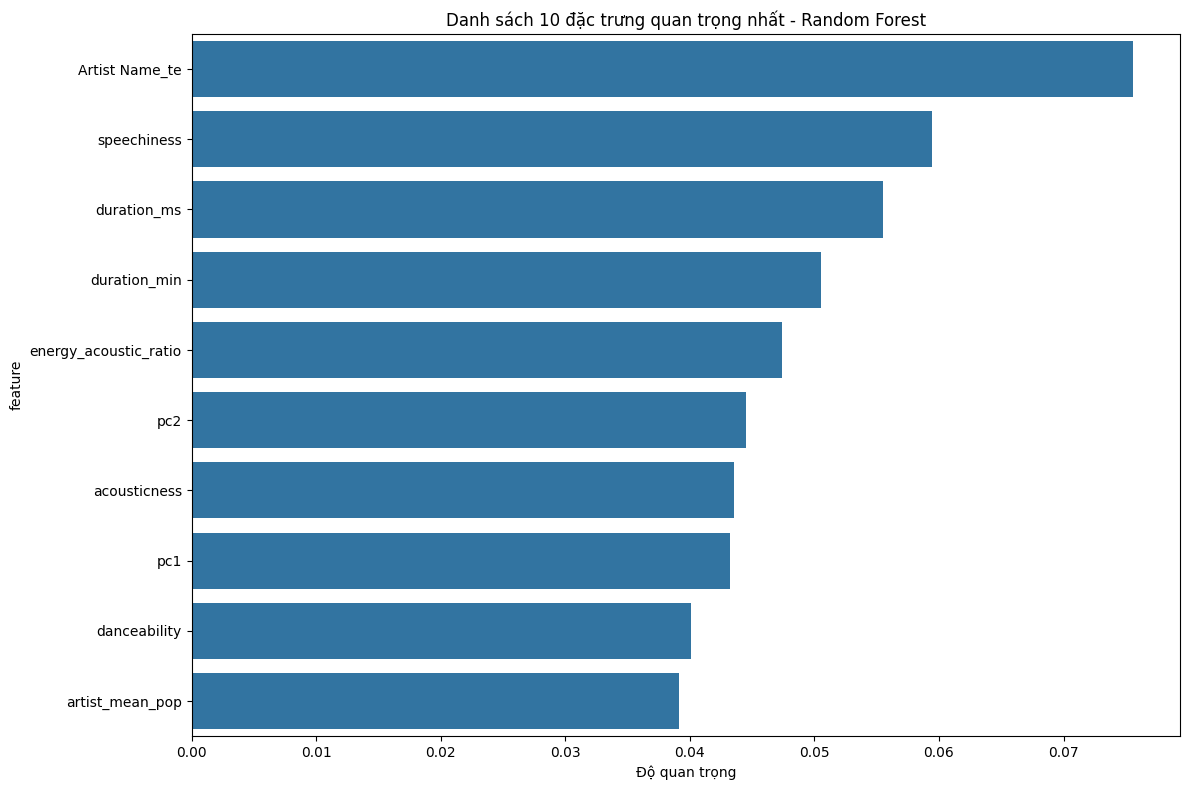

In [7]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Danh sách 10 đặc trưng quan trọng nhất - Random Forest')
plt.xlabel('Độ quan trọng')
plt.tight_layout()
plt.show()


### Dự đoán trên tập test & đánh giá và lưu kết quả

In [8]:
test_predictions = rf_model.predict(X_test)

print(f"Số lượng dự đoán: {len(test_predictions)}")
print("Phân phối dự đoán:")
print(pd.Series(test_predictions).value_counts().sort_index())

Số lượng dự đoán: 3600
Phân phối dự đoán:
0      145
1      113
2      224
3       75
4       85
5      265
6      519
7      104
8      309
9      467
10    1294
Name: count, dtype: int64


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


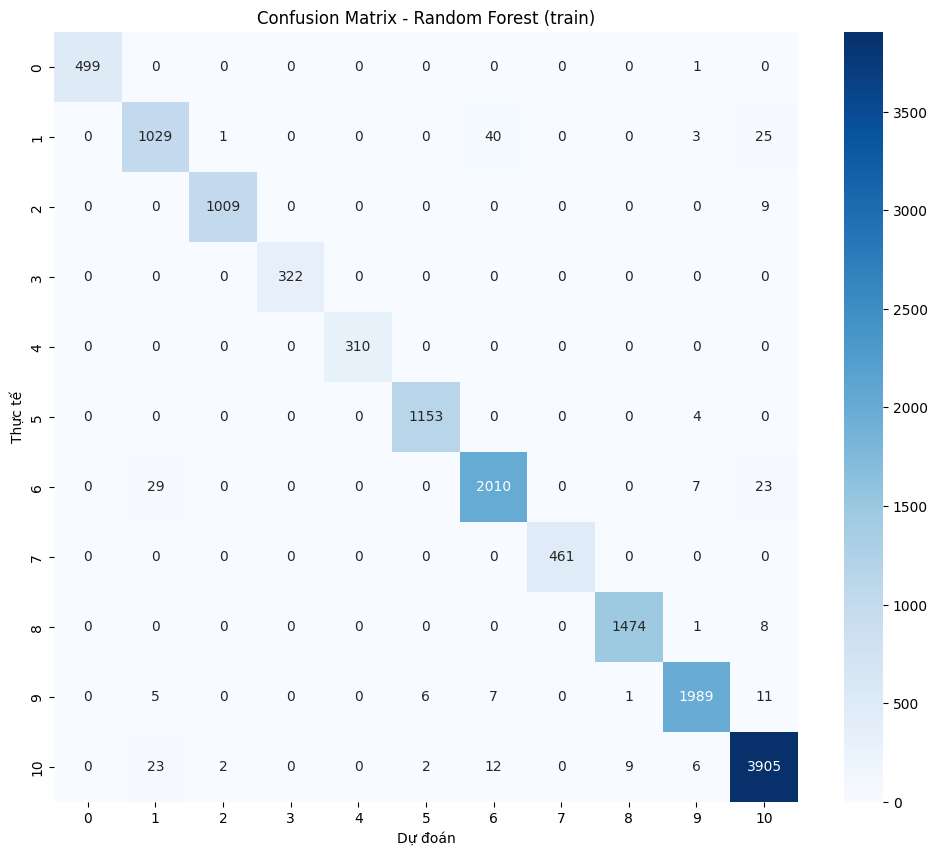

In [9]:
y_train_pred = rf_model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (train)')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

In [10]:
submission = pd.DataFrame({
    'Id': test_exp2['Id'],
    'Class': test_predictions
})

# Lưu file submission
submission_file_path = 'results/RF_submission.csv'
submission.to_csv(submission_file_path, index=False)
print(f"File submission đã được lưu tại: {submission_file_path}")

File submission đã được lưu tại: results/RF_submission.csv


### Tổng quan hoá bằng biểu đồ

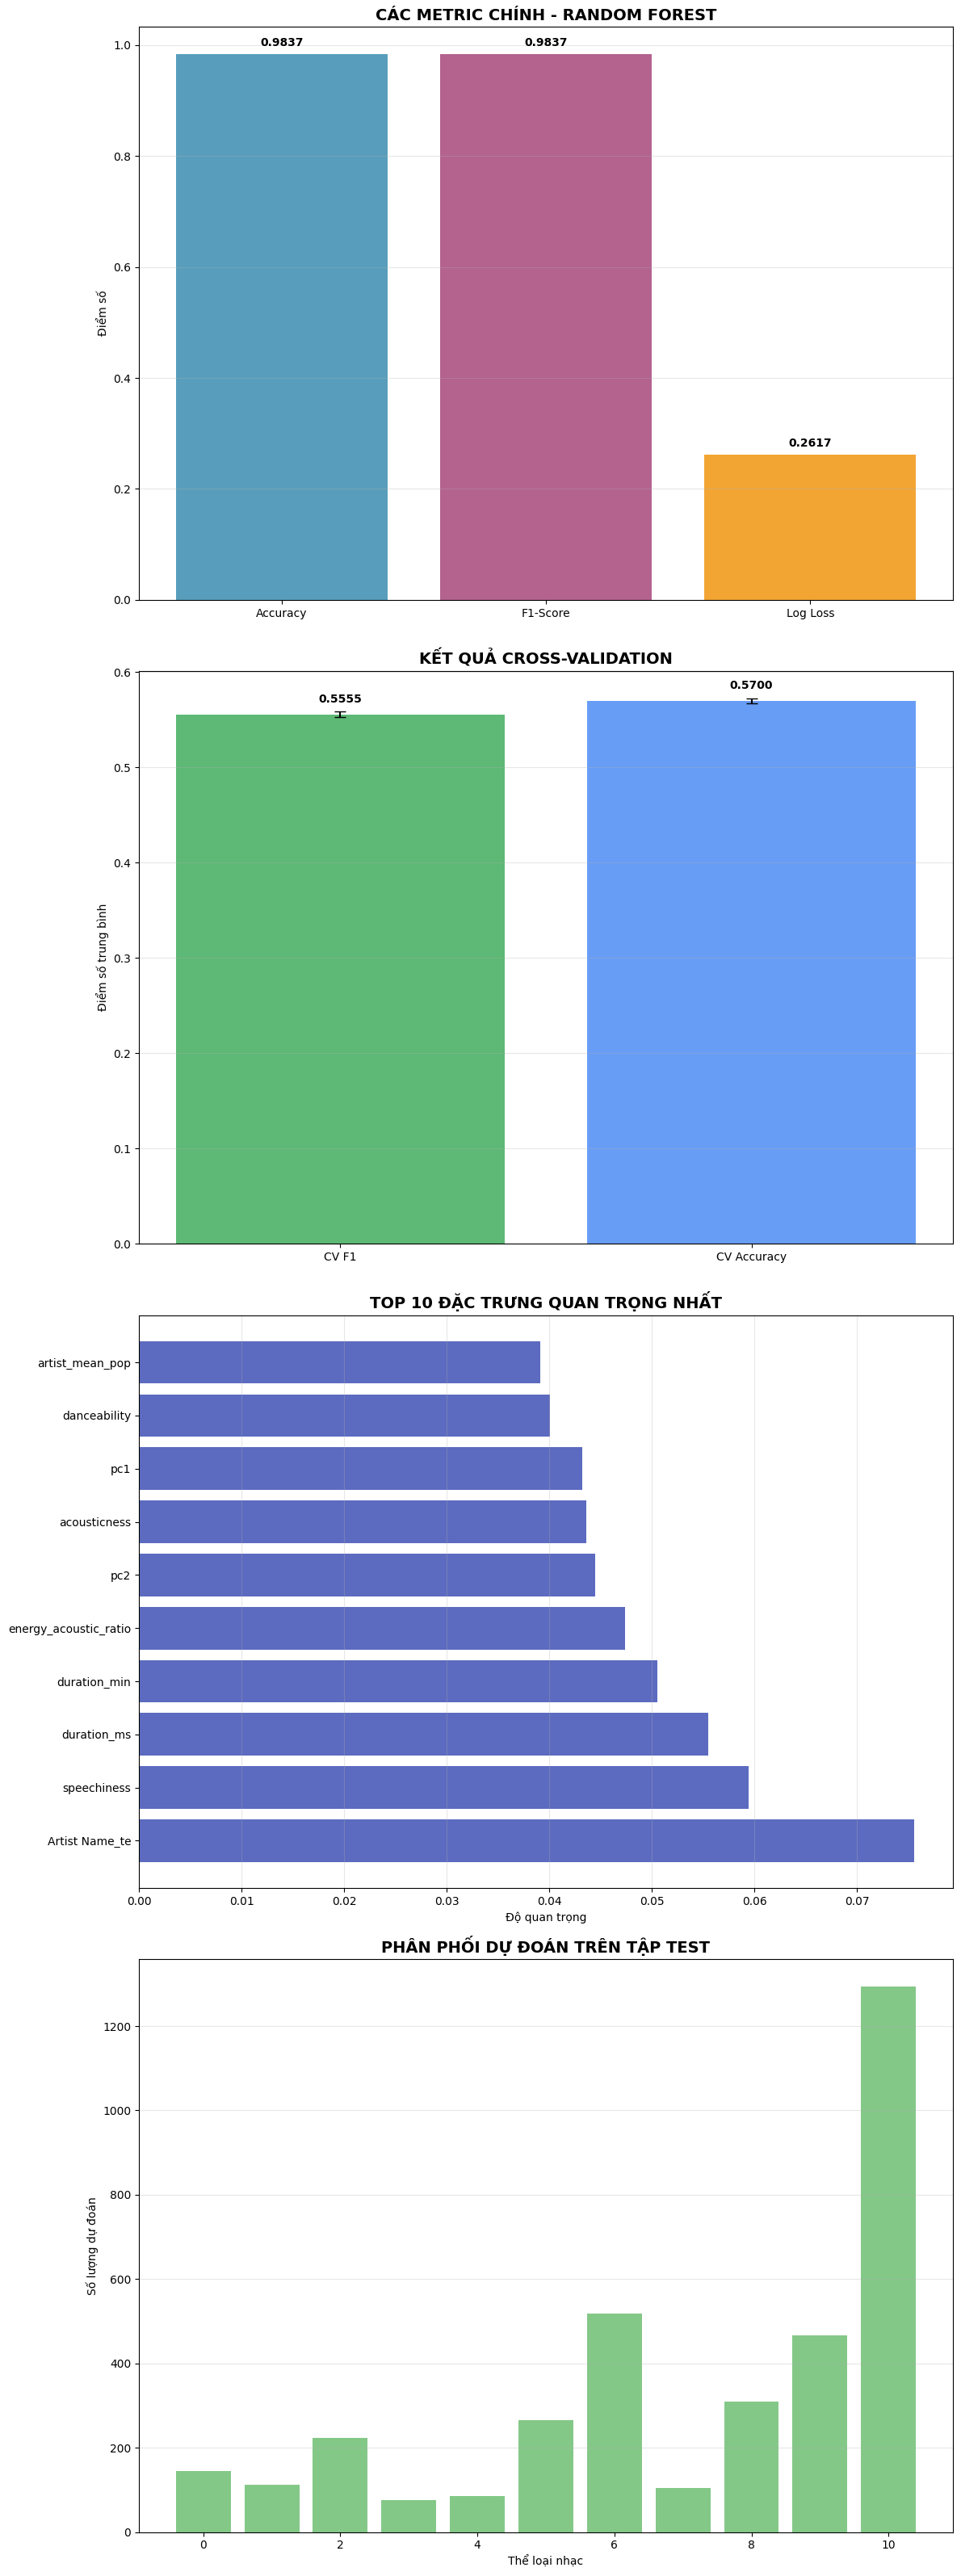

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(12, 32))

# 1. Biểu đồ metrics chính
metrics_rf = ['Accuracy', 'F1-Score', 'Log Loss']
values_rf = [train_accuracy_rf, train_f1_rf, train_log_loss_rf]
colors_rf = ['#2E86AB', '#A23B72', '#F18F01']

bars_rf = axes[0].bar(metrics_rf, values_rf, color=colors_rf, alpha=0.8)
axes[0].set_title('CÁC METRIC CHÍNH - RANDOM FOREST', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Điểm số')
axes[0].grid(axis='y', alpha=0.3)

for bar, value in zip(bars_rf, values_rf):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 2. Biểu đồ cross-validation
cv_metrics_rf = ['CV F1', 'CV Accuracy']
cv_means_rf = [cv_f1_scores_rf.mean(), cv_accuracy_scores_rf.mean()]
cv_stds_rf = [cv_f1_scores_rf.std(), cv_accuracy_scores_rf.std()]

bars_cv_rf = axes[1].bar(cv_metrics_rf, cv_means_rf, yerr=cv_stds_rf, capsize=5, 
                        color=['#34A853', '#4285F4'], alpha=0.8)
axes[1].set_title('KẾT QUẢ CROSS-VALIDATION', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Điểm số trung bình')
axes[1].grid(axis='y', alpha=0.3)

for bar, value in zip(bars_cv_rf, cv_means_rf):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. Biểu đồ feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[2].barh(range(len(feature_importance_rf)), feature_importance_rf['importance'], color='#5C6BC0')
axes[2].set_yticks(range(len(feature_importance_rf)))
axes[2].set_yticklabels(feature_importance_rf['feature'])
axes[2].set_title('TOP 10 ĐẶC TRƯNG QUAN TRỌNG NHẤT', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Độ quan trọng')
axes[2].grid(axis='x', alpha=0.3)

# 4. Biểu đồ phân phối dự đoán
pred_distribution_rf = pd.Series(test_predictions).value_counts().sort_index()
axes[3].bar(pred_distribution_rf.index, pred_distribution_rf.values, color='#66BB6A', alpha=0.8)
axes[3].set_title('PHÂN PHỐI DỰ ĐOÁN TRÊN TẬP TEST', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Thể loại nhạc')
axes[3].set_ylabel('Số lượng dự đoán')
axes[3].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()